# Visualize What Convnets Learn

It’s often said that deep-learning models are “black boxes”: learning representations that are difficult to extract and present in a human-readable form. Although this is partially true for certain types of deep-learning models, it’s definitely not true for convnets. The representations learned by convnets are highly amenable to visualization, in large part because they’re **representations of visual concepts**.
 - **Visualizing intermediate convnet outputs (intermediate activations)—** Useful for understanding how successive convnet layers transform their input, and for getting a first idea of the meaning of individual convnet filters.
 - **Visualizing convnets filters—** Useful for understanding precisely what visual pattern or concept each filter in a convnet is receptive to.
 - **Visualizing heatmaps of class activation in an image—** Useful for understanding which parts of an image were identified as belonging to a given class, thus allowing you to localize objects in images.
 
For the first method—activation visualization—we’ll use the small convnet that we trained from scratch on the dogs-versus-cats classification problem.

#### Visualize Intermediate Activations
Visualizing intermediate activations consists of displaying the feature maps that are output by various convolution and pooling layers in a network, given a certain input (the output of a layer is often called its **activation**, the output of the activation function). This gives a view into how an input is decomposed into the different filters learned by the network. We want to visualize feature maps with three dimensions: width, height, and depth (channels). Each channel encodes relatively independent features, so the proper way to visualize these feature maps is by independently plotting
the contents of every channel as a 2D image. Let’s start by loading the model that
we saved earlier: ```cats_and_dogs_small_2.h5```

In [99]:
from keras.models import load_model
model= load_model('cats_and_dogs_small_2.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

Next, we’ll get an input image—a picture of a cat, not part of the images the network was trained on.

#### Preprocess a Single Image

In [100]:
img_path= 'C:/Users/soumyama/Documents/Python Scripts/Keras/Cat_Dog/data/test/cats/cat.1700.jpg'

from keras.preprocessing import image #Preprocesses the image into a 4D tensor
import numpy as np

img= image.load_img(img_path, target_size=(150,150))
img_tensor= image.img_to_array(img)
img_tensor.shape

(150, 150, 3)

In [101]:
img_tensor= np.expand_dims(img_tensor, axis=0) #Same as img_tensor= img_tensor.reshape((1,)+img_tensor.shape)
img_tensor.shape

(1, 150, 150, 3)

In [102]:
img_tensor/=255 #Remember that the model was trained on inputs that were preprocessed this way.
print(img_tensor.shape)

(1, 150, 150, 3)


#### Display The Test Picture

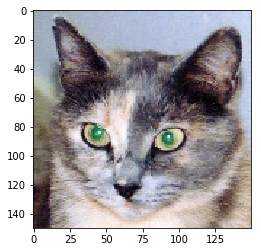

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(img_tensor[0])
plt.show()

In order to extract the feature maps we want to look at, we’ll create a Keras model that takes batches of images as input, and outputs the activations of all convolution and pooling layers. To do this, we’ll use the Keras class ```Model```. A model is instantiated using two arguments: an input tensor (or list of input tensors) and an output tensor (or list of output tensors). The resulting class is a Keras model, just like the ```Sequential``` models we’re familiar with, mapping the specified inputs to the specified outputs. What sets the ```Model``` class apart is that it allows for models with multiple outputs, unlike
```Sequential```.

#### Instantiate A Model From An Input Tensor And A List Of Output Tensors

In [104]:
from keras import models

layer_outputs= [layer.output for layer in model.layers[:8]] #Extracts the outputs of the top eight layers
activation_model= models.Model(inputs= model.input, outputs= layer_outputs) #Creates a model that will return these 
                                                                                #outputs, given the model input

activation_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5_input (InputLayer)  (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
__________

When fed an image input, this model returns the values of the layer activations in the original model. This is a multi-output model. 
In the general case, a model can have any number of inputs and outputs. This one has one input and eight outputs: one output per layer activation.

#### Run The model In Predict Mode

In [105]:
activations= activation_model.predict(img_tensor) #Returns a list of five Numpy arrays: one array per layer activation
activations

[array([[[[0.03589407, 0.30337155, 0.2951847 , ..., 0.        ,
           0.        , 0.16208452],
          [0.04120122, 0.29955086, 0.2866268 , ..., 0.        ,
           0.        , 0.16276786],
          [0.04315837, 0.30887085, 0.29004344, ..., 0.        ,
           0.        , 0.14948104],
          ...,
          [0.04917508, 0.39225474, 0.36231983, ..., 0.        ,
           0.        , 0.19649634],
          [0.05686938, 0.38717365, 0.3616283 , ..., 0.        ,
           0.        , 0.1941846 ],
          [0.05705651, 0.38876852, 0.36893556, ..., 0.        ,
           0.        , 0.1945595 ]],
 
         [[0.04129241, 0.30546016, 0.28860337, ..., 0.        ,
           0.        , 0.16640258],
          [0.04625849, 0.30633003, 0.27960646, ..., 0.        ,
           0.        , 0.16757545],
          [0.04336518, 0.30187076, 0.286711  , ..., 0.        ,
           0.        , 0.14704366],
          ...,
          [0.05095173, 0.39129326, 0.3675279 , ..., 0.        ,
   

For instance, this is the activation of the first convolution layer for the cat image input:

In [106]:
first_layer_activation=activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


It’s a 148 × 148 feature map with 32 channels. Let’s try plotting the first channel of the activation of the first layer of the original model

#### Visualize The First Channel

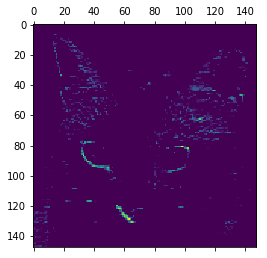

In [107]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0,:,:,11], cmap='viridis')

This channel appears to encode a diagonal edge detector. Let’s try the fourteenth channel —but note that channels may vary, because the specific filters learned by convolution layers aren’t deterministic.

#### Visualize The 14th Channel

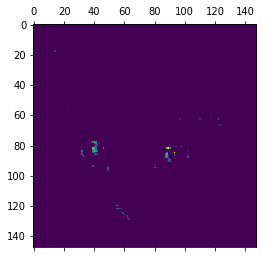

In [108]:
plt.matshow(first_layer_activation[0,:,:,14], cmap='viridis')

This one looks like a “bright green dot” detector, useful to encode cat eyes. At this point, let’s plot a complete visualization of all the activations in the network. We’ll extract and plot every channel in each of the eight activation maps, and we’ll stack the results in one big image tensor, with channels stacked side by side.

#### Visualize Every Channel in Every Intermediate Activation

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


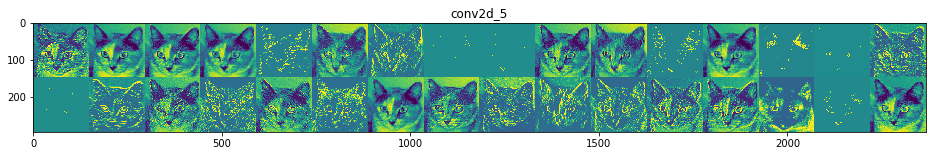

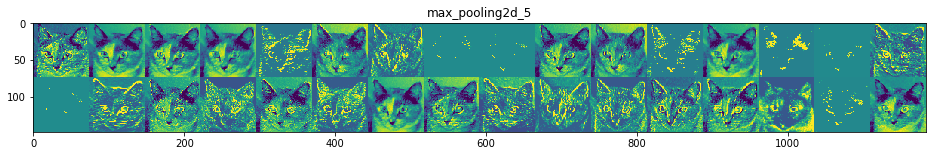

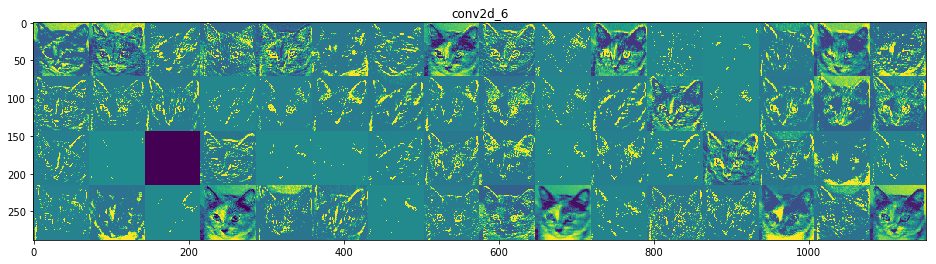

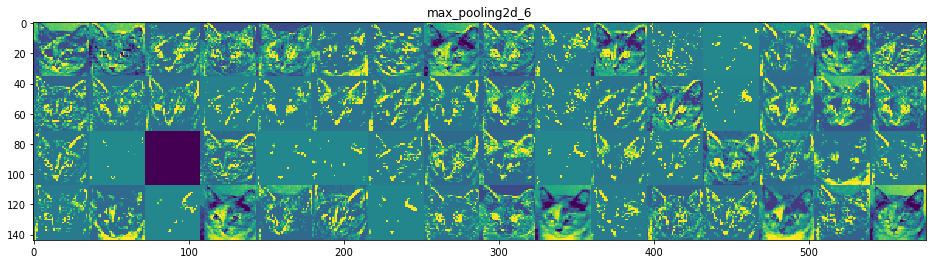

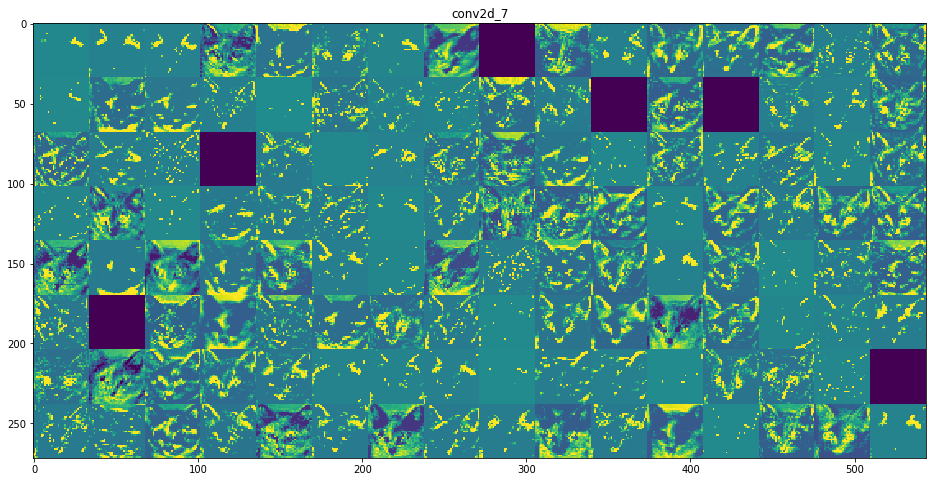

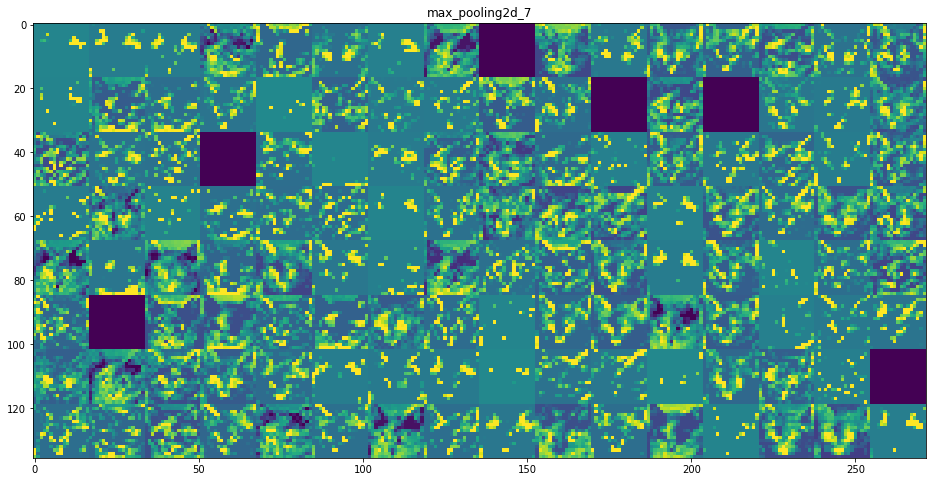

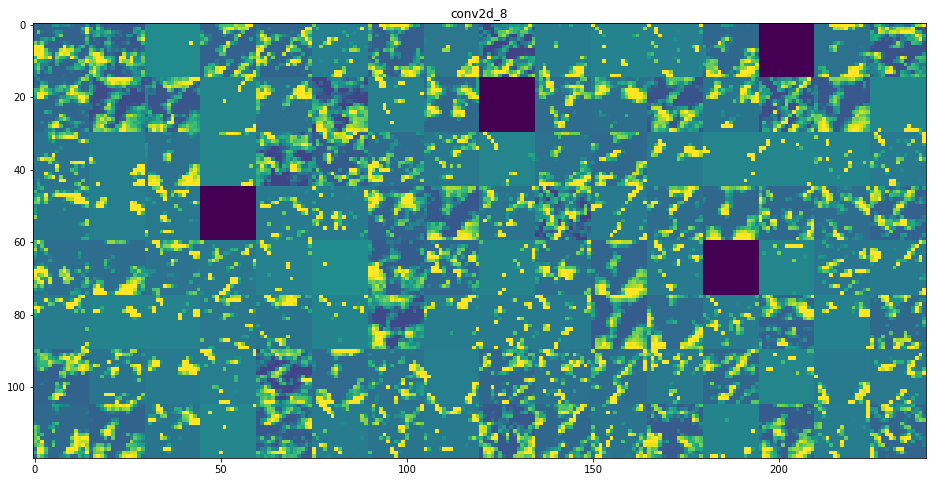

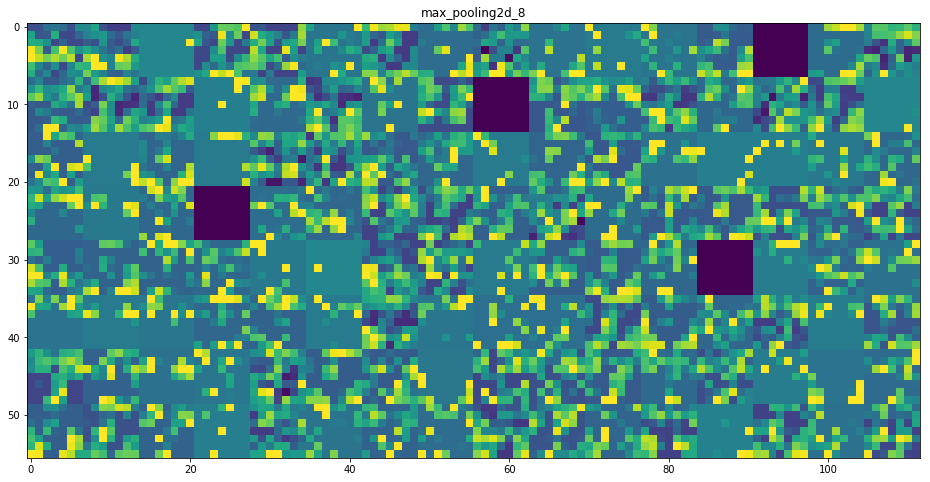

In [109]:
#These are the names of the layers, so can have them as part of our plot
layer_names=[]

for layer in model.layers[:8]:
    layer_names.append(layer.name)
    
images_per_row=16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features= layer_activation.shape[-1]
    # The feature map has shape (1, size, size, n_features)
    size= layer_activation.shape[1]
    
    # We will tile the activation channels in this matrix
    n_cols=n_features//images_per_row
    display_grid= np.zeros((size*n_cols, images_per_row*size))
    
    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image= layer_activation[0,:,:,col*images_per_row+row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *=64
            channel_image += 128
            channel_image= np.clip(channel_image, 0,255).astype('uint8')
            display_grid[size*col:size*(col+1), size*row:size*(row+1)]=channel_image
        
    #Display Grid
    scale= 1./size
    plt.figure(figsize=(scale*display_grid.shape[1],
                       scale*display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

There are a few things to note here:
 - The first layer acts as a collection of various edge detectors. At that stage, the activations retain almost all of the information present in the initial picture.
 - As we go higher, the activations become increasingly abstract and less visually interpretable. They begin to encode higher-level concepts such as “cat ear” and “cat eye.” Higher presentations carry increasingly less information about the visual contents of the image, and increasingly more information related to the class of the image.
 - The sparsity of the activations increases with the depth of the layer: in the first layer, all filters are activated by the input image; but in the following layers, more and more filters are blank. This means the pattern encoded by the filter isn’t found in the input image.
 
We have just evidenced an important universal characteristic of the representations learned by deep neural networks: the features extracted by a layer become increasingly abstract with the depth of the layer. The activations of higher layers carry less and less information about the specific input being seen, and more and more information about the target (in this case, the class of the image: cat or dog). A deep neural network effectively acts as an **information distillation pipeline**, with raw data going in (in this case, RGB pictures) and being repeatedly transformed so that irrelevant information is filtered out (for example, the specific visual appearance of the image), and useful information is magnified and refined (for example, the class of the image).

This is analogous to the way humans and animals perceive the world: after observing a scene for a few seconds, a human can remember which abstract objects were present in it (bicycle, tree) but can’t remember the specific appearance of these
objects. In fact, if we tried to draw a generic bicycle from memory, chances are weu couldn’t get it even remotely right, even though we’ve seen thousands of bicycles in our lifetime. Our brain has learned to completely abstract its visual input—to transform it into high-level visual concepts while filtering out irrelevant visual details—making it tremendously difficult to remember how things around us look.
![capture](https://user-images.githubusercontent.com/13174586/49935498-2a9b5400-fef7-11e8-9955-aa7eaa2bf884.JPG)


### Visualize Convnet Filters
Another easy way to inspect the filters learned by convnets is to display the visual pattern that each filter is meant to respond to. This can be done with **gradient ascent in input space**: applying **gradient descent** to the value of the input image of a convnet so as to **maximize** the response of a specific filter, starting from a blank input image. The
resulting input image will be one that the chosen filter is maximally responsive to.

The process is simple: we’ll build a loss function that maximizes the value of a given filter in a given convolution layer, and then we’ll use stochastic gradient descent to adjust the values of the input image so as to maximize this activation value.
For instance, here’s a loss for the activation of filter 0 in the layer ```block3_conv1``` of the VGG16 network, pretrained on ImageNet.

#### Define The Loss Tensor For Filter Visualization

In [111]:
from keras.applications import VGG16
from keras import backend as K

model= VGG16(weights='imagenet', include_top=False)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [115]:
layer_name='block3_conv1'
filter_index=0

layer_output= model.get_layer(layer_name).output
print(layer_output)

loss= K.mean(layer_output[:,:,:,filter_index])
print(loss)

Tensor("block3_conv1_1/Relu:0", shape=(?, ?, ?, 256), dtype=float32)
Tensor("Mean_1:0", shape=(), dtype=float32)


To implement gradient descent, we’ll need the ```gradient``` of this loss with respect to the model’s input. To do this, we’ll use the gradients function packaged with the ```backend``` module of Keras.

#### Obtain The Gradient of The Loss With Regard to The Input

In [117]:
grads= K.gradients(loss, model.input)[0] #The call to gradients returns a list of tensors (of size 1 in this case). Hence,
                                        #you keep only the first element—which is a tensor.
print(grads)

Tensor("gradients_1/block1_conv1_1/convolution_grad/Conv2DBackpropInput:0", shape=(?, ?, ?, 3), dtype=float32)


A non-obvious trick to use to help the gradient-descent process go smoothly is to normalize the gradient tensor by dividing it by its L2 norm (the square root of the average of the square of the values in the tensor). This ensures that the magnitude of the updates done to the input image is always within the same range.

#### Gradient-normalization Trick

In [118]:
grads/= (K.sqrt(K.mean(K.square(grads)))+1e-5) #Add 1e–5 before dividing to avoid accidentally dividing by 0.

Now we need a way to compute the value of the loss tensor and the gradient tensor, given an input image. We can define a Keras backend function to do this: **iterate** is a function that takes a Numpy tensor (as a list of tensors of size 1) and returns a list of two Numpy tensors: the loss value and the gradient value.

#### Fetch Numpy Output Values Given Numpy Input Values

In [123]:
iterate= K.function([model.input],[loss, grads])
print(iterate)

import numpy as np
loss_value, grads_value =iterate([np.zeros((1,150,150,3))])
print(loss_value)
print(grads_value)

0.0
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]


At this point, we can define a Python loop to do stochastic gradient descent.

#### Loss Maximization via Stochastic Gradient Descent